# Linear Regression - 렌트비 예측

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 살펴보기

In [3]:
url = 'https://github.com/DSNote/fastcampus/raw/main/rent.csv'

In [4]:
rent_df = pd.read_csv(url)
rent_df.info()

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [5]:
rent_df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2.0,15000,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3.0,29000,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3.0,35000,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3.0,45000,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2.0,15000,1000.0,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [6]:
round(rent_df.describe(), 2)

,BHK,Rent,Size,Bathroom
count,4743.00,4746.00,4741.00,4746.00
mean,2.08,34993.45,967.48,1.97
std,0.83,78106.41,634.53,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


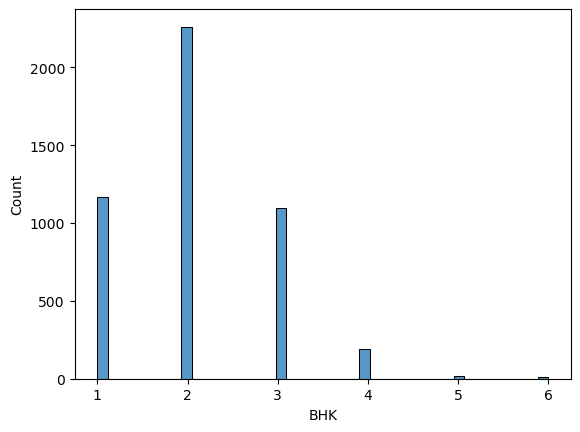

In [7]:
sns.histplot(data=rent_df,x='BHK')
plt.show()

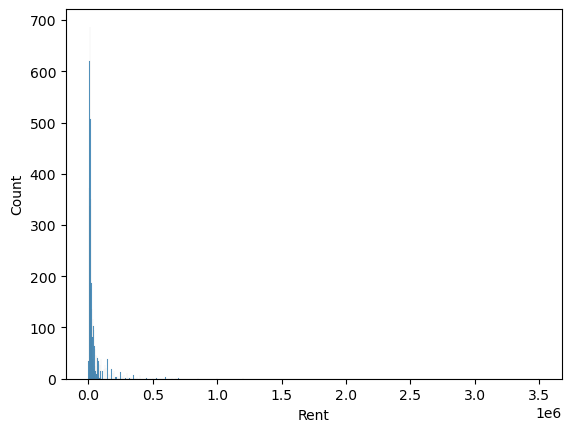

In [8]:
sns.histplot(data=rent_df, x='Rent')
plt.show()

In [9]:
rent_df['Rent'].sort_values(ascending=False)

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
         ...   
146        2200
2475       2000
471        1800
285        1500
4076       1200
Name: Rent, Length: 4746, dtype: int64

In [10]:
rent_df.drop(1837)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2.0,20000,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2.0,17000,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,NaN,10000,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2.0,7500,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2.0,15000,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3.0,29000,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3.0,35000,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3.0,45000,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


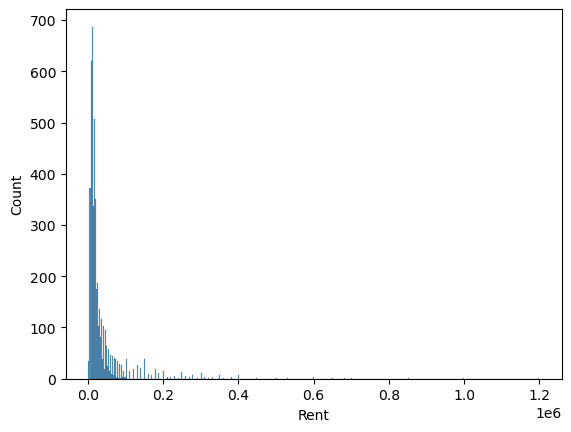

In [11]:
sns.histplot(data=rent_df.drop(1837), x='Rent')
plt.show()

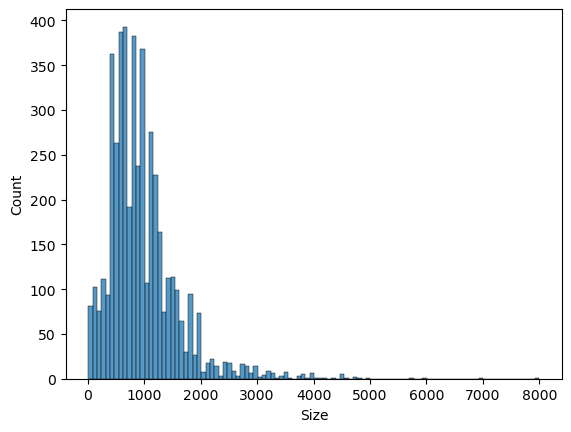

In [12]:
sns.histplot(data=rent_df, x='Size')
plt.show()

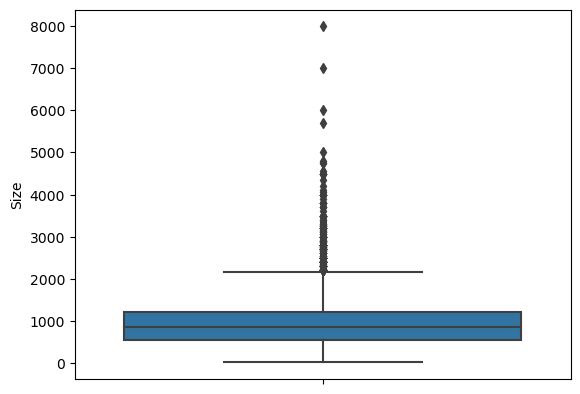

In [13]:
sns.boxplot(data=rent_df, y='Size')
plt.show()

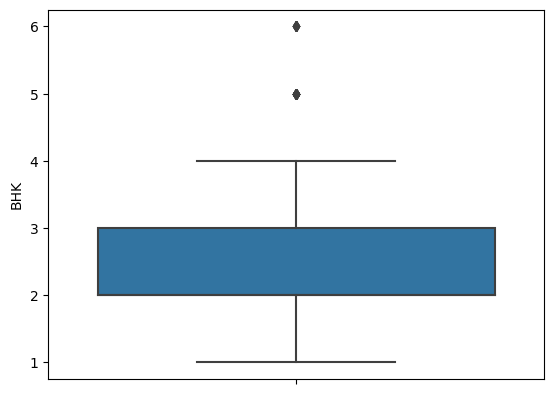

In [14]:
sns.boxplot(data=rent_df, y='BHK')
plt.show()

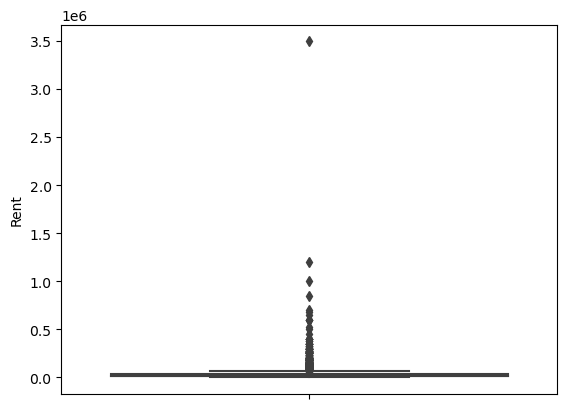

In [15]:
sns.boxplot(data=rent_df, y='Rent')
plt.show()

## 결측치 처리

In [16]:
rent_df.isnull().sum()

Posted On            0
BHK                  3
Rent                 0
Size                 5
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [17]:
rent_df.isnull().mean()

Posted On            0.000000
BHK                  0.000632
Rent                 0.000000
Size                 0.001054
Floor                0.000000
Area Type            0.000000
Area Locality        0.000000
City                 0.000000
Furnishing Status    0.000000
Tenant Preferred     0.000000
Bathroom             0.000000
Point of Contact     0.000000
dtype: float64

In [18]:
rent_df[rent_df.isnull().any(axis=1)]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3,2022-07-04,NaN,10000,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
53,2022-04-23,NaN,15000,1000.0,Ground out of 2,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
89,2022-05-31,NaN,8500,550.0,2 out of 3,Carpet Area,Kasba -East,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Agent
425,2022-05-22,2.0,9000,NaN,2 out of 3,Super Area,Airport Area Behala,Kolkata,Furnished,Bachelors/Family,2,Contact Owner
430,2022-05-08,2.0,8500,NaN,Ground out of 1,Carpet Area,Nayabad,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
4703,2022-07-06,2.0,12000,NaN,4 out of 4,Super Area,"Anandbagh, Secunderabad, Moula Ali Road",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
4731,2022-06-24,2.0,13000,NaN,2 out of 2,Super Area,"Manikonda, Outer Ring Road",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4732,2022-07-08,2.0,7000,NaN,Ground out of 2,Super Area,Vinayaka Nagar,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner


In [19]:
rent_df.dropna()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2.0,20000,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2.0,17000,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2.0,7500,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2.0,7000,600.0,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2.0,15000,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3.0,29000,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3.0,35000,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3.0,45000,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [20]:
rent_df[rent_df['Size'].isna()].index

Int64Index([425, 430, 4703, 4731, 4732], dtype='int64')

In [21]:
na_index = rent_df[rent_df['Size'].isna()].index
rent_df.loc[na_index]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
425,2022-05-22,2.0,9000,NaN,2 out of 3,Super Area,Airport Area Behala,Kolkata,Furnished,Bachelors/Family,2,Contact Owner
430,2022-05-08,2.0,8500,NaN,Ground out of 1,Carpet Area,Nayabad,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
4703,2022-07-06,2.0,12000,NaN,4 out of 4,Super Area,"Anandbagh, Secunderabad, Moula Ali Road",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
4731,2022-06-24,2.0,13000,NaN,2 out of 2,Super Area,"Manikonda, Outer Ring Road",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4732,2022-07-08,2.0,7000,NaN,Ground out of 2,Super Area,Vinayaka Nagar,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner


In [22]:
rent_df.loc[na_index].fillna(-99)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
425,2022-05-22,2.0,9000,-99.0,2 out of 3,Super Area,Airport Area Behala,Kolkata,Furnished,Bachelors/Family,2,Contact Owner
430,2022-05-08,2.0,8500,-99.0,Ground out of 1,Carpet Area,Nayabad,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
4703,2022-07-06,2.0,12000,-99.0,4 out of 4,Super Area,"Anandbagh, Secunderabad, Moula Ali Road",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
4731,2022-06-24,2.0,13000,-99.0,2 out of 2,Super Area,"Manikonda, Outer Ring Road",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4732,2022-07-08,2.0,7000,-99.0,Ground out of 2,Super Area,Vinayaka Nagar,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner


In [23]:
rent_df['Size'] = rent_df['Size'].fillna(rent_df['Size'].median())
rent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2.0,20000,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2.0,17000,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,NaN,10000,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2.0,7500,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2.0,15000,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3.0,29000,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3.0,35000,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3.0,45000,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [24]:
rent_df.loc[na_index]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
425,2022-05-22,2.0,9000,850.0,2 out of 3,Super Area,Airport Area Behala,Kolkata,Furnished,Bachelors/Family,2,Contact Owner
430,2022-05-08,2.0,8500,850.0,Ground out of 1,Carpet Area,Nayabad,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
4703,2022-07-06,2.0,12000,850.0,4 out of 4,Super Area,"Anandbagh, Secunderabad, Moula Ali Road",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
4731,2022-06-24,2.0,13000,850.0,2 out of 2,Super Area,"Manikonda, Outer Ring Road",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4732,2022-07-08,2.0,7000,850.0,Ground out of 2,Super Area,Vinayaka Nagar,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner


In [25]:
rent_df[rent_df.isnull().any(axis=1)]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3,2022-07-04,NaN,10000,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
53,2022-04-23,NaN,15000,1000.0,Ground out of 2,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
89,2022-05-31,NaN,8500,550.0,2 out of 3,Carpet Area,Kasba -East,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Agent


In [26]:
rent_df = rent_df.fillna(rent_df.median())

C:\Users\dukim\AppData\Local\Temp\ipykernel_8796\1618718706.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rent_df = rent_df.fillna(rent_df.median())


In [27]:
rent_df.isna().any(axis=1).sum()

0

## 카테고리 변수 처리

In [28]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   float64
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 445.1+ KB


In [29]:
rent_df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [30]:
rent_df['Area Type'].nunique()

3

In [31]:
rent_df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [32]:
rent_df.head(1)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner


In [33]:
for i in ['Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']:
    print(i, rent_df[i].nunique())

Area Type 3
Area Locality 2235
City 6
Furnishing Status 3
Tenant Preferred 3
Point of Contact 3


In [34]:
rent_df = rent_df.drop(['Posted On', 'Floor', 'Area Locality'], axis=1)
rent_df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2.0,10000,1100.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2.0,20000,800.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2.0,17000,1000.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2.0,10000,800.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2.0,7500,850.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [35]:
rent_df = pd.get_dummies(rent_df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']) #, drop_first=True)
rent_df.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2.0,10000,1100.0,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2.0,20000,800.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2.0,17000,1000.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2.0,10000,800.0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2.0,7500,850.0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


## Train/Test set 나누기

In [36]:
X = rent_df.drop('Rent', axis=1)
y = rent_df['Rent']

In [37]:
X.head()

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2.0,1100.0,2,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2.0,800.0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2.0,1000.0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2.0,800.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2.0,850.0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [40]:
X_train

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
1854,2.0,1100.0,2,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
598,2.0,570.0,2,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
3911,2.0,990.0,2,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
4389,3.0,1250.0,2,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3431,1.0,150.0,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,1.0,350.0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
522,3.0,850.0,3,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2259,3.0,1700.0,3,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2982,2.0,1200.0,2,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


## 모델링

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(X_test)
y_pred

array([15084.98796666, -7932.6462415 , 18499.76068154, ...,
        2381.46426717, 27319.12132196,  7385.9164394 ])

In [44]:
y_test

4039     19800
81        8200
3399     13000
2893      9000
4371     13000
         ...  
876     250000
2099     26000
3089     11000
4430      8000
280       4500
Name: Rent, Length: 1424, dtype: int64

## 성능 측정

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mean_absolute_error(y_test, y_pred) # mae

23006.35588419328

In [47]:
mean_squared_error(y_test, y_pred) # mse

1515372846.9327335

In [48]:
mean_squared_error(y_test, y_pred, squared=False) # rmse

38927.79016246278

## 아웃라이어 제거

In [49]:
rent_df.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2.0,10000,1100.0,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2.0,20000,800.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2.0,17000,1000.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2.0,10000,800.0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2.0,7500,850.0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [50]:
rent_df['Rent'].sort_values(ascending=False)

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
         ...   
146        2200
2475       2000
471        1800
285        1500
4076       1200
Name: Rent, Length: 4746, dtype: int64

In [51]:
X_train.loc[1837]

BHK                                     3.0
Size                                 2500.0
Bathroom                                3.0
Area Type_Built Area                    0.0
Area Type_Carpet Area                   1.0
Area Type_Super Area                    0.0
City_Bangalore                          1.0
City_Chennai                            0.0
City_Delhi                              0.0
City_Hyderabad                          0.0
City_Kolkata                            0.0
City_Mumbai                             0.0
Furnishing Status_Furnished             0.0
Furnishing Status_Semi-Furnished        1.0
Furnishing Status_Unfurnished           0.0
Tenant Preferred_Bachelors              1.0
Tenant Preferred_Bachelors/Family       0.0
Tenant Preferred_Family                 0.0
Point of Contact_Contact Agent          1.0
Point of Contact_Contact Builder        0.0
Point of Contact_Contact Owner          0.0
Name: 1837, dtype: float64

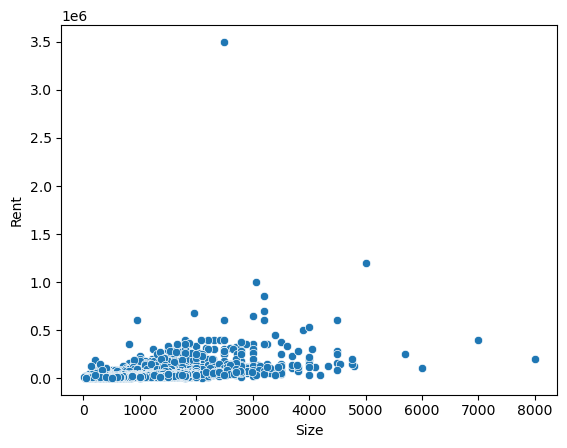

In [52]:
sns.scatterplot(data=rent_df, x='Size', y='Rent')
plt.show()

In [53]:
X_train = X_train.drop(1837)
X_train

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
1854,2.0,1100.0,2,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
598,2.0,570.0,2,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
3911,2.0,990.0,2,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
4389,3.0,1250.0,2,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3431,1.0,150.0,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,1.0,350.0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
522,3.0,850.0,3,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2259,3.0,1700.0,3,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2982,2.0,1200.0,2,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [54]:
y_train = y_train.drop(1837)
y_train

1854      8900
598      14000
3911      9000
4389     25000
3431      7500
         ...  
2423     12000
522      18000
2259     35000
2982     31000
1199    120000
Name: Rent, Length: 3321, dtype: int64

In [55]:
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(X=X_test)
y_pred

array([15687.02345762, -6646.87481929, 19315.23725179, ...,
        5320.5977308 , 22169.71565372,  9548.1289293 ])

In [57]:
mean_squared_error(y_test, y_pred, squared=False)

38550.25172844045

## Log 활용하기

In [58]:
a = [1,2,3,4,5]
b = [1,10,100,1000,10000]

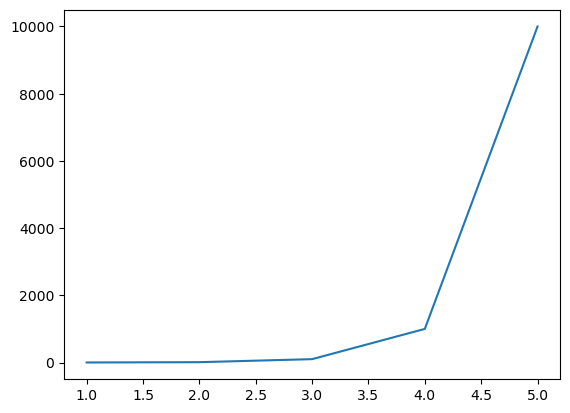

In [59]:
sns.lineplot(x=a, y=b)
plt.show()

In [60]:
b_log = np.log(b)

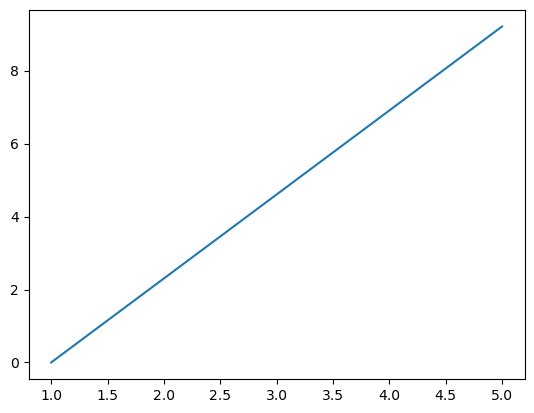

In [61]:
sns.lineplot(x=a,y=b_log)
plt.show()

In [62]:
np.exp(b_log)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

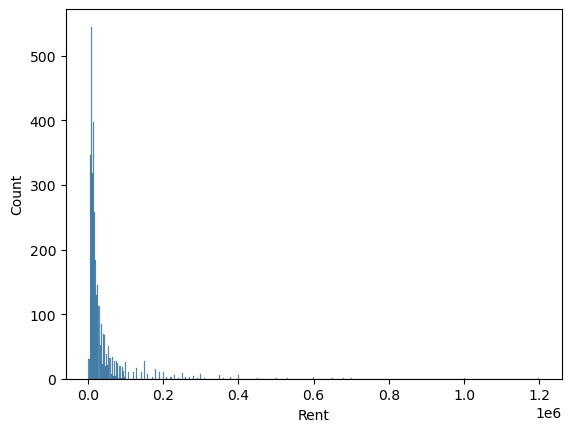

In [63]:
sns.histplot(x=y_train)
plt.show()

In [64]:
y_train_log = np.log(y_train)

In [65]:
lr.fit(X=X_train, y=y_train_log)

LinearRegression()

In [66]:
y_pred_log = lr.predict(X=X_test)

In [67]:
y_pred = np.exp(y_pred_log)

In [68]:
mean_squared_error(y_test, y_pred, squared=False)

32632.780523342823